## **Import Python Libraries, Modules**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc, roc_auc_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)
from sklearn import metrics
import scipy.stats as stats
import time
from sklearn.preprocessing import MinMaxScaler

##**Data Loading and Overview**





In [ ]:
employee = pd.read_csv("HR-Employee-Attrition.csv")

In [ ]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#checking the size of the dataset
employee.shape

#There are 34 features and 1 label(Attrition)

(1470, 35)

In [ ]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Data Cleaning

In [ ]:
# check for nulls
employee.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
#Remove columns with 1 unique value( not important)

employee.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber', 'HourlyRate'], axis=1, inplace=True)
employee.shape

(1470, 30)

In [ ]:
#check if there are duplicate values

print("The no of duplicates in our dataset is:", employee.duplicated().sum())

The no of duplicates in our dataset is: 0


## **Data Exploration and Visualization**

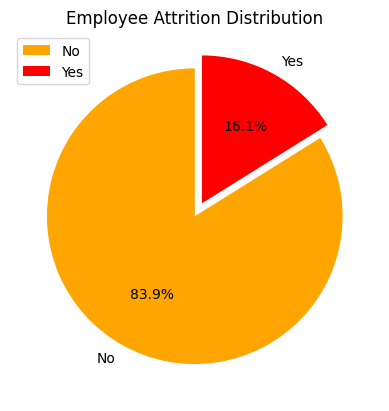

In [ ]:
# Count the number of observations for each target class
class_counts = employee['Attrition'].value_counts()
colors = ['orange', 'red']
plt.pie(class_counts, labels=class_counts.index, colors=colors, autopct='%1.1f%%', explode=[0, 0.1], startangle=90)
plt.title('Employee Attrition Distribution')
plt.legend(class_counts.index, loc="upper left")
plt.show()


In [ ]:
#Create seperate list for numerical and Categorical Features
column_list = employee.columns.tolist()
cat_features = []
num_features = []
for data in column_list:
    if employee[data].dtype != 'int64':
        cat_features.append(data)
        continue 

for data in column_list:
    if employee[data].dtype == 'int64':
        num_features.append(data)
        continue
print(f'List of categorical features:{cat_features}')
print(f'List of numerical features:{num_features}')

List of categorical features:['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
List of numerical features:['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


<Axes: >

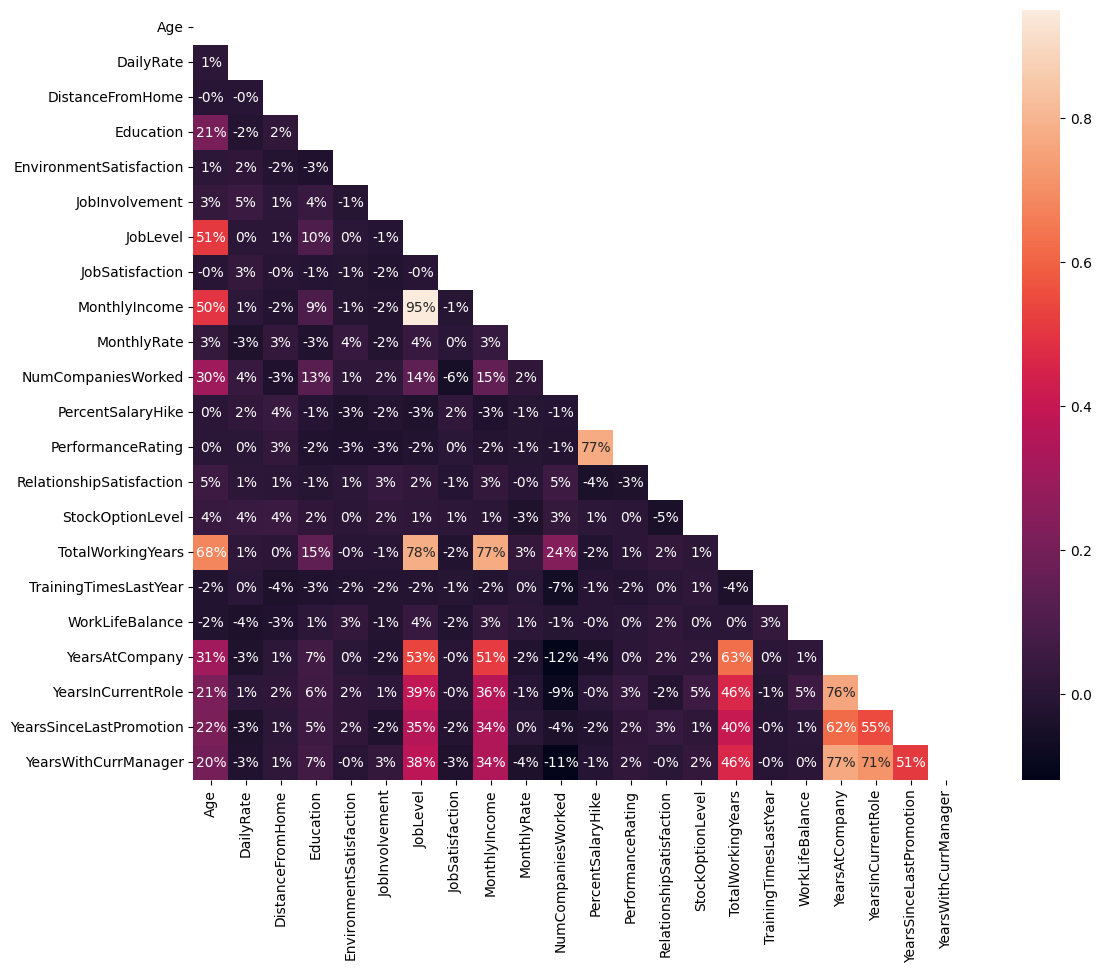

In [ ]:
#Checking the correlation between the independent variables(numerical features)
numeric_features = employee.select_dtypes(include=np.number).columns

mask = np.zeros_like(employee[numeric_features].corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(employee[numeric_features].corr(), annot=True, fmt='.0%', mask=mask, square=True)

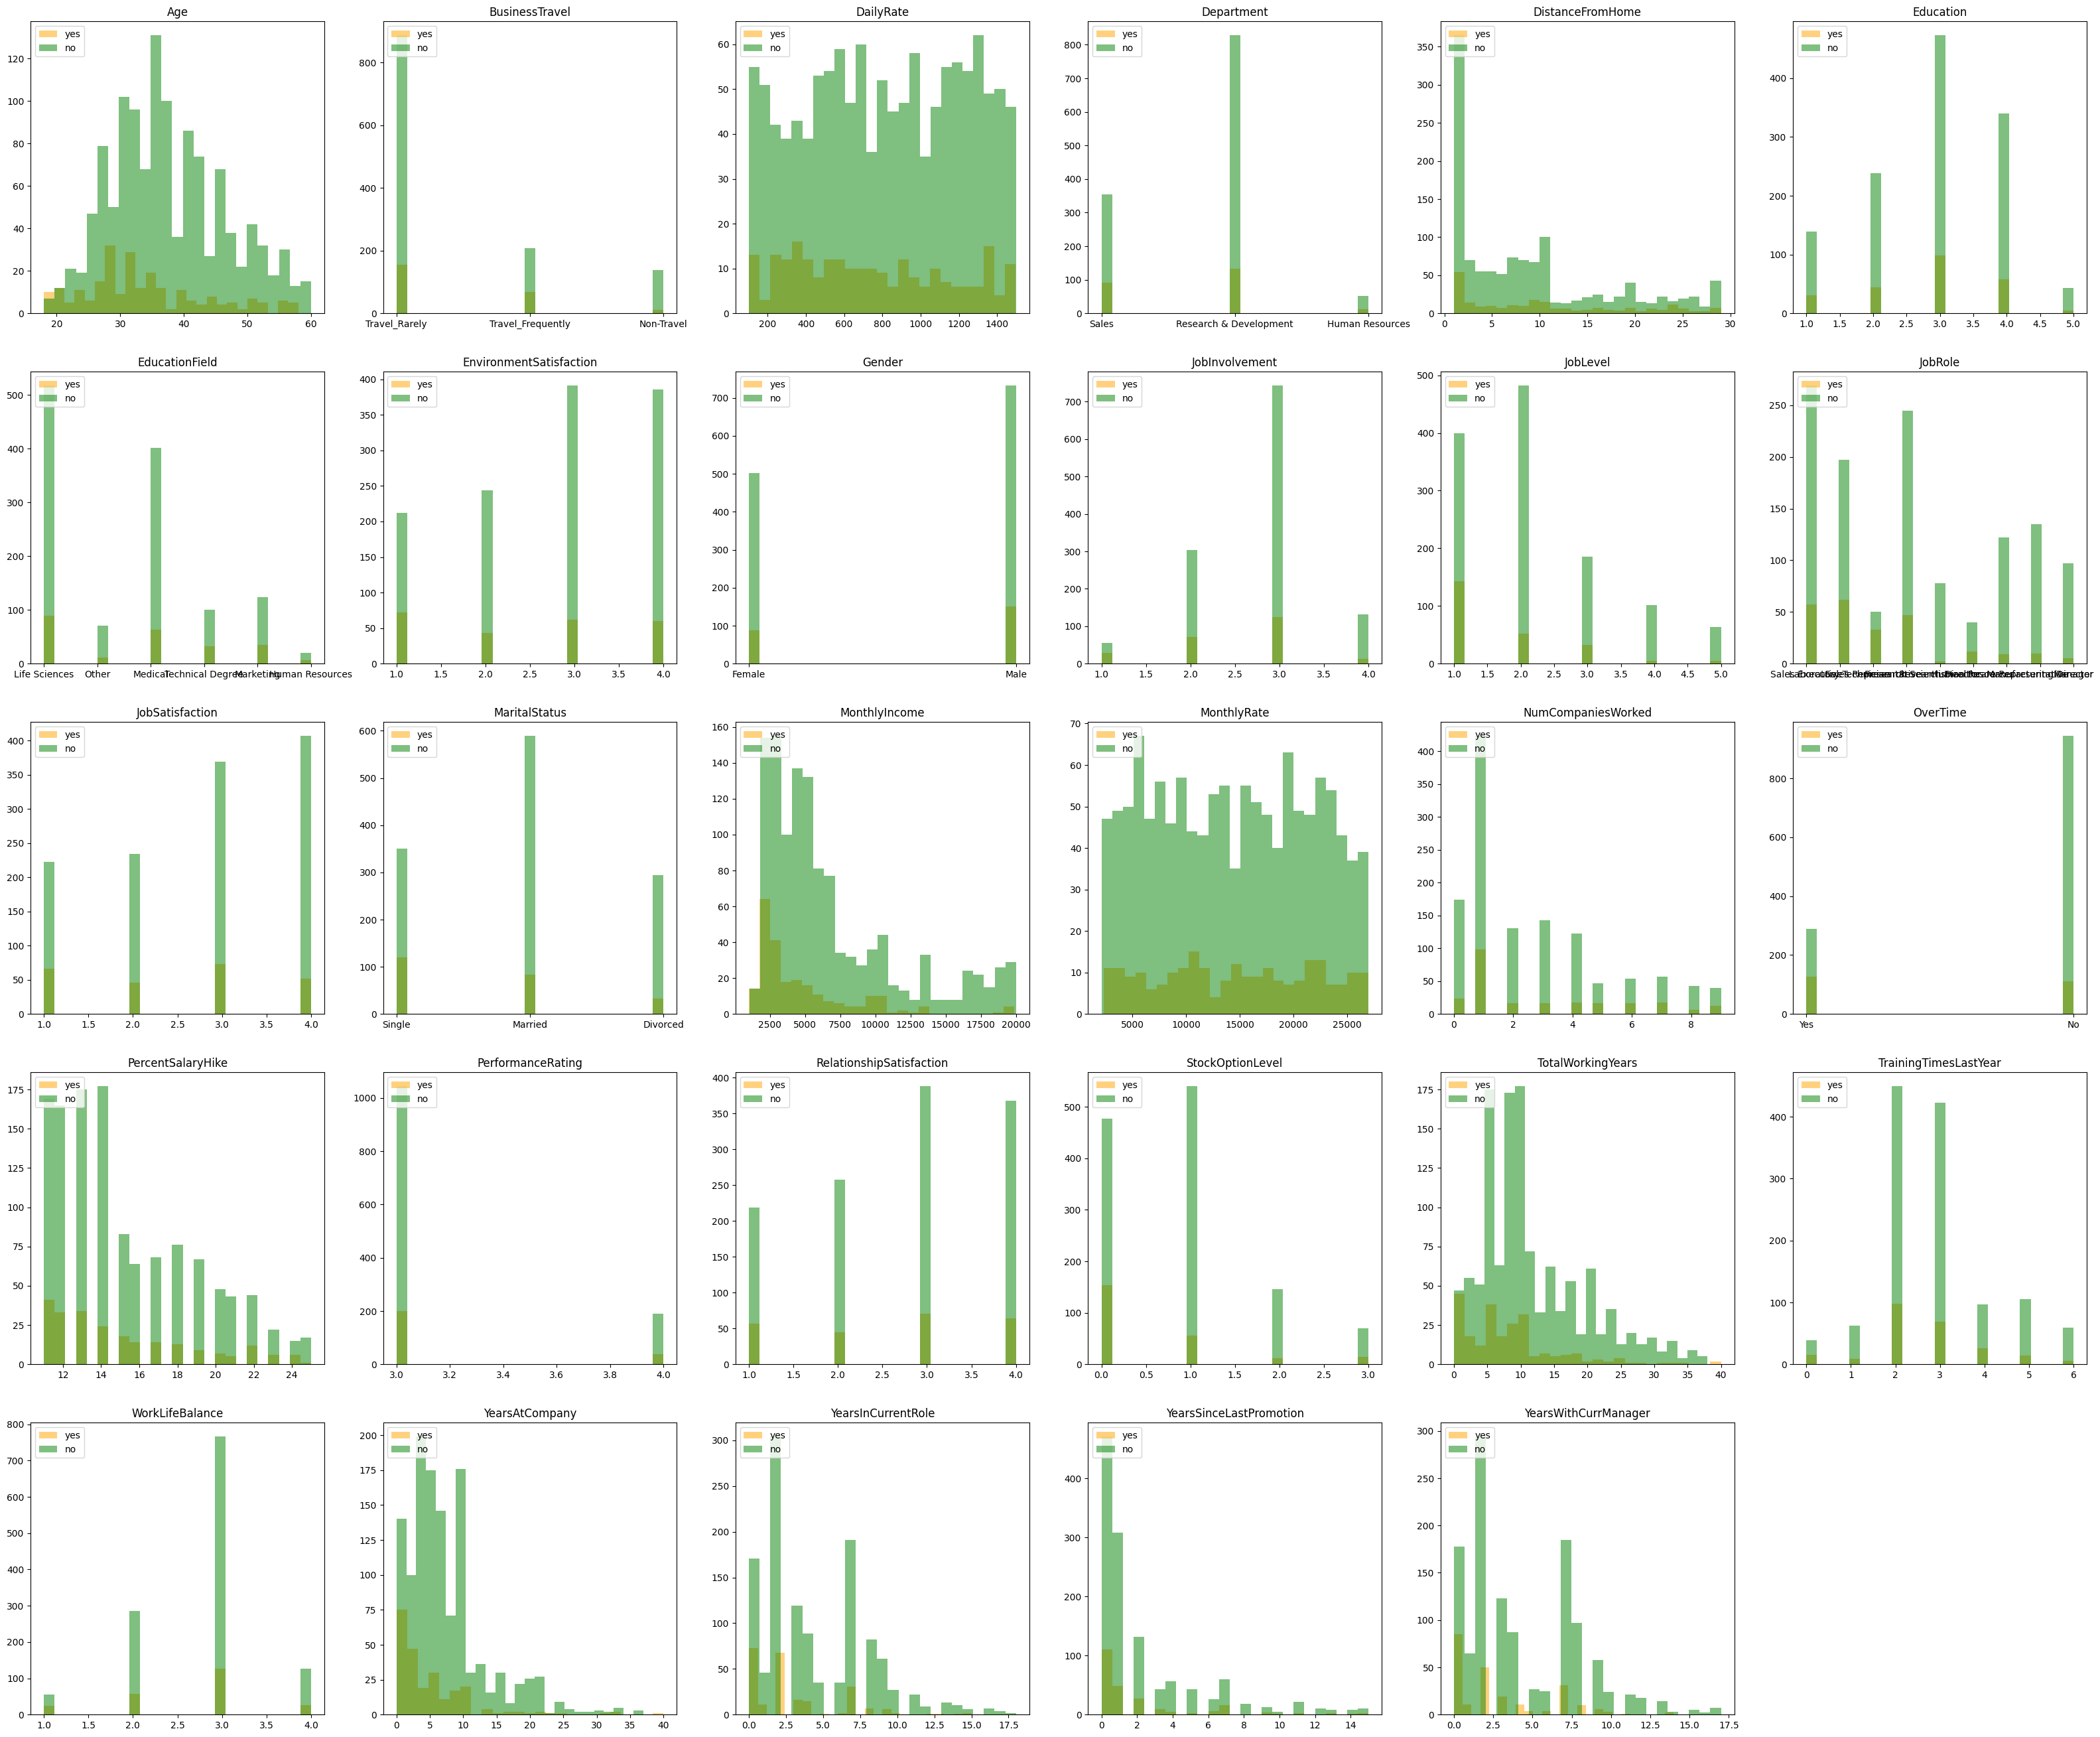

In [ ]:
#Checking the relationship between all features and class label(Attrition)
n=1
plt.figure(figsize=(40, 40))
for column in employee:
  if column=="Attrition":
    continue
  yes = employee[employee['Attrition'] == 'Yes'][column]
  no = employee[employee['Attrition'] == 'No'][column]
  plt.subplot(6, 6, n)
  plt.hist(yes, bins=25, alpha=0.5, label='yes', color='orange')
  plt.hist(no, bins=25, alpha=0.5, label='no', color='green')
  plt.legend(loc='upper left')
  plt.title(column)
  n+=1

## **Data Preprocessing**



### **Fearture Scaling**

 Variables have varying scales, which is typical for most datasets, however, having a sizable scale difference between features typically results in a tendency for slower algorithm optimisation. As a result, feature scaling is frequently used to enhance learning efficacy and classification performance. In our dataset for example, employee age ranges between 18 to 60 years, while the monthly income range from 2,094 to 26,999, creating a huge scale gap. MinMaxScaler was used to rescale numerical features' values to a particular range, often between 0 and 1. It operates by taking the greatest value of the feature, subtracting the minimum value, and dividing the result by the range.

In [ ]:
# Feature scalling using MinMaxScaler

employee_prep = employee.copy()
scaler = MinMaxScaler()
employee_prep[num_features] = scaler.fit_transform(employee_prep[num_features])

In [ ]:
#Label Encoding: To convert class label (Attrition) to binary values using LabelEncoder method
employee_prep['Attrition'] = LabelEncoder().fit_transform(employee_prep['Attrition'])
employee_prep.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1,Travel_Rarely,0.715820,Sales,0.000000,0.25,Life Sciences,0.333333,Female,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0,Travel_Frequently,0.126700,Research & Development,0.250000,0.00,Life Sciences,0.666667,Male,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1,Travel_Rarely,0.909807,Research & Development,0.035714,0.25,Other,1.000000,Male,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0,Travel_Frequently,0.923407,Research & Development,0.071429,0.75,Life Sciences,1.000000,Female,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0,Travel_Rarely,0.350036,Research & Development,0.035714,0.00,Medical,0.000000,Male,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


###One hot encoding

One hot encoding is a technique used to convert categorical data into numerical.Each category of a categorical variable is converted into a binary vector representation, with only one element of the vector being 1 and all other elements being 0. 7 categorical features were converted and this added 21 additional binary features to the dataset

In [ ]:
cat_features.remove('Attrition')

encoder = OneHotEncoder()  # Create a OneHotEncoder object
# Fit and transform the encoder on the categorical features
encoded_data = encoder.fit_transform(employee_prep[cat_features])

encoded_cols = []
for i, col in enumerate(cat_features):
    for val in sorted(employee_prep[col].unique()):
        encoded_cols.append(f"{col}_{val}")
# Convert the encoded data to an array and create a DataFrame with new column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_cols)
# Concatenate the encoded DataFrame with the original data
employee_encoded = pd.concat([employee_prep.drop(cat_features, axis=1), encoded_df], axis=1)


In [ ]:
employee_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,1,0.715820,0.000000,0.25,0.333333,0.666667,0.25,1.000000,0.262454,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0,0.126700,0.250000,0.00,0.666667,0.333333,0.25,0.333333,0.217009,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,1,0.909807,0.035714,0.25,1.000000,0.333333,0.00,0.666667,0.056925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0,0.923407,0.071429,0.75,1.000000,0.666667,0.00,0.666667,0.100053,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0,0.350036,0.035714,0.00,0.000000,0.666667,0.00,0.333333,0.129489,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## **Model/Algorithms Evaluation**

### Creating Training and Test Data

The original dataset was divided into two parts with a 70:30 ratio, one used for training and one used for testing 

Train set contained 70% of the dataset dedicated to the training phase while Test set contained the remaining 30%, dedicated to the test and validation
phase in order to evaluate the general performance of the model and to calculate errors between predicted and actual results

In [ ]:
#Data split into training and validation(test) set
X = employee_encoded.drop(['Attrition'], axis = 1)
y = employee_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [ ]:
#Seven classifiers were selected for model training

def model_training(X, y):
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('GNB', GaussianNB()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('GBC', GradientBoostingClassifier(random_state=0)))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier(random_state=0)))
    models.append(('SVM', SVC(gamma='auto')))

    # evaluate each model in turn

    names = []
    train_accuracy = []
    scoring_metrics = ['accuracy', 'f1', 'recall', 'precision']

    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring_metrics, return_train_score=True)
        names.append(name)

        print(name + ":")
        print("Accuracy:", 'train:', np.mean(cv_results['train_accuracy']), '| test:', np.mean(cv_results['test_accuracy']))
        print("Precision:", 'train:', np.mean(cv_results['train_precision']),'| test:', np.mean(cv_results['test_precision']))
        print("Recall:" , 'train: ', np.mean(cv_results['train_recall']), '| test: ', np.mean(cv_results['test_recall']))
        print("F1-Score:" , 'train: ', np.mean(cv_results['train_f1']), '| test: ', np.mean(cv_results['test_f1']))
        print("------------------------------------------------------")
        train_accuracy.append(cv_results['test_accuracy'])
    return names, train_accuracy


### Imbalanced Dataset

In [ ]:
#Imbalance Data
print('Imbalance Data Performance Result')
print('---------------------------------------')
names_imb, train_accuracy_imb = model_training(X, y)

Imbalance Data Performance Result
---------------------------------------
LR:
Accuracy: train: 0.8934240362811792 | test: 0.8857142857142858
Precision: train: 0.8230001466594399 | test: 0.8068174962292609
Recall: train:  0.4322539598964504 | test:  0.40054347826086956
F1-Score: train:  0.5664908760554968 | test:  0.5227934555703108
------------------------------------------------------
GNB:
Accuracy: train: 0.6913832199546486 | test: 0.6802721088435375
Precision: train: 0.3126602005183073 | test: 0.30032719466326024
Recall: train:  0.7590101355798342 | test:  0.741304347826087
F1-Score: train:  0.442619022667711 | test:  0.4271248265544553
------------------------------------------------------
KNN:
Accuracy: train: 0.8810279667422524 | test: 0.8530612244897959
Precision: train: 0.8410081802496858 | test: 0.6359704184704185
Recall: train:  0.32347417840375586 | test:  0.21431159420289853
F1-Score: train:  0.46674239129026696 | test:  0.3143579074182522
----------------------------------

### Oversampling Method: Random Oversampling

Random oversampling is a simple technique that duplicates samples randomly from the minority class to balance the class distribution.

In [ ]:
#Random Oversampling performed on the train dataset
print("Before Oversampling:")
print(pd.Series(y_train).value_counts())
ros = RandomOverSampler(random_state=42)
X_train_OS, y_train_OS = ros.fit_resample(X_train, y_train)
print("After Oversampling:")
print(pd.Series(y_train_OS).value_counts())
#concatenate the resampled training data along the rows with the original test data
X_ros = np.concatenate((X_test, X_train_OS), axis=0)
y_ros = np.concatenate((y_test, y_train_OS), axis=0)

Before Oversampling:
0    869
1    160
Name: Attrition, dtype: int64
After Oversampling:
0    869
1    869
Name: Attrition, dtype: int64


In [ ]:
#Random Oversampling
print('Random Oversampling Performance Result')
print('---------------------------------------')
names_ros, train_accuracy_ros = model_training(X_ros, y_ros)

Random Oversampling Performance Result
---------------------------------------
LR:
Accuracy: train: 0.7730356633247407 | test: 0.7599818204878874
Precision: train: 0.7531118264132071 | test: 0.7417534644695272
Recall: train:  0.710006178867171 | test:  0.6933482642777155
F1-Score: train:  0.7309083562230791 | test:  0.7154119662999647
------------------------------------------------------
GNB:
Accuracy: train: 0.692774261192125 | test: 0.6865598444171985
Precision: train: 0.6152647225951304 | test: 0.609509545344992
Recall: train:  0.7804808482701929 | test:  0.7747928331466964
F1-Score: train:  0.688061696975868 | test:  0.6821544859927221
------------------------------------------------------
KNN:
Accuracy: train: 0.9026057041982263 | test: 0.8490149241111065
Precision: train: 0.845200069716387 | test: 0.7831750337667384
Recall: train:  0.9496124415903964 | test:  0.9048376259798431
F1-Score: train:  0.8943600326756757 | test:  0.8389438457880203
-------------------------------------

### Undersampling Method: Random Undersampling

Random undersampling is a method deployed to balance the class distribution by deleting samples at random from the majority class until the required balance is reached.

In [ ]:
#Random Undersampling performed on the train dataset 

print("Before Oversampling:")
print(pd.Series(y_train).value_counts())
rus = RandomUnderSampler(random_state=42)
X_train_US, y_train_US = rus.fit_resample(X_train, y_train)
print("After Undersampling:")
print(pd.Series(y_train_US).value_counts())

#concatenate the resampled training data along the rows with the original test data
X_rus = np.concatenate((X_test, X_train_US), axis=0)
y_rus = np.concatenate((y_test, y_train_US), axis=0)

Before Oversampling:
0    869
1    160
Name: Attrition, dtype: int64
After Undersampling:
0    160
1    160
Name: Attrition, dtype: int64


In [ ]:
#Random Oversampling
print('Random Undersampling Performance Result')
print('---------------------------------------')
names_rus, train_accuracy_rus = model_training(X_rus, y_rus)


Random Undersampling Performance Result
---------------------------------------
LR:
Accuracy: train: 0.8255214069236351 | test: 0.8094155844155843
Precision: train: 0.7895794353791101 | test: 0.7557297655904467
Recall: train:  0.5996402088543724 | test:  0.5708333333333333
F1-Score: train:  0.68147074262354 | test:  0.6470837415562316
------------------------------------------------------
GNB:
Accuracy: train: 0.646958424040637 | test: 0.6148838004101161
Precision: train: 0.46603099869097947 | test: 0.44438406928856844
Recall: train:  0.8011780966170857 | test:  0.7731884057971016
F1-Score: train:  0.587293349025252 | test:  0.5604557608764654
------------------------------------------------------
KNN:
Accuracy: train: 0.8075645622572246 | test: 0.7385680109364319
Precision: train: 0.7707042240166458 | test: 0.6173227185611087
Recall: train:  0.5443310956079154 | test:  0.4228260869565217
F1-Score: train:  0.6378363517922165 | test:  0.4999547271456697
---------------------------------

#**Select Best Model**

7 models were evaluated obtained soring metrics: accuracy, precision, recall and F1 score for each. Comparing the algorithms indicates Random Forest (RF) ave the best performance with accuracy at 96%, precision, 97%, recall at 94% and 95% F1 score. Below is a plot of the model evaluation results and compare the spread and the mean accuracy of each model. 

### Algorithm comparison by Plot

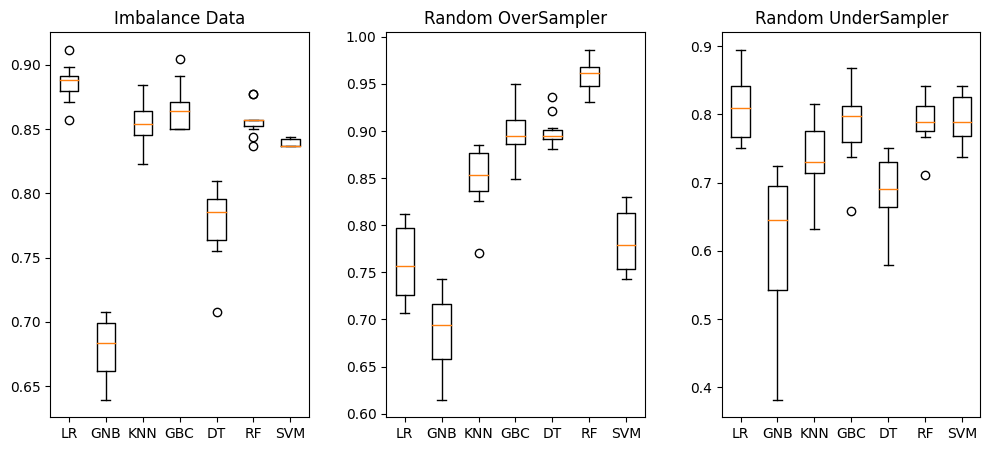

In [ ]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

axes[0].boxplot(train_accuracy_imb, labels=names_imb)
axes[0].set_title('Imbalance Data')

axes[1].boxplot(train_accuracy_ros, labels=names_ros)
axes[1].set_title('Random OverSampler')

axes[2].boxplot(train_accuracy_rus, labels=names_rus)
axes[2].set_title('Random UnderSampler')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()


# **Prediction Model**

# **Make Predictions**

An algorithm was selected to to use to make predictions.

The results in the previous section suggest that the SVM was perhaps the most accurate model. We will use this model as our final model.

Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result

### Hyperparameter Tuning: Random Forest

To improve the performance of the selected prediction model; Random Forest, Grid search and Random search techniques were deployed to find the optimal hyperparameters. While grid search involves comprehensively searching through a manually specified subset of the hyperparameter space, random search investigates combinations of hyperparameters from a specified search space randomly.

In [ ]:
def tuned_model(best_param, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    RF = RandomForestClassifier(**best_param, random_state=42)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}%".format(precision * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F1-score: {:.2f}%".format(f1score * 100))

    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay (confusion_matrix=cm,
                                                 display_labels = ['Positive', 'Negative'])
    cm_display.plot()
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
#Hyperparameter tuning using Random Search and Grid Search Techniques

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=1)

# Define the hyperparameter search space
param_dist = {'n_estimators': randint(50, 200),
              'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 10)}

param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10]}

# Initialize a Random Forest classifier with 100 trees
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize a RandomizedSearchCV object with 10 iterations
start_rs = time.time()
RF_rs = RandomizedSearchCV(estimator=RF, param_distributions=param_dist, n_iter=10, cv=5, random_state=0)
RF_rs.fit(X_ros, y_ros)
rs_best_params = RF_rs.best_params_
end_rs = time.time()
print("Random Search Time taken:", end_rs - start_rs, "seconds")

#GridSearchCV Hypertuning
start_gs = time.time()
RF_gs = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5)
RF_gs.fit(X, y)
gs_best_params = RF_gs.best_params_
end_gs = time.time()
print("Grid Search Time taken:", end_gs - start_gs, "seconds")

Random Search Time taken: 18.607504844665527 seconds
Grid Search Time taken: 559.9388496875763 seconds


Random Forest with Random Search Tuning
-----------------------------------------
Accuracy: 92.35%
Precision: 91.30%
Recall: 90.65%
F1-score: 90.97%


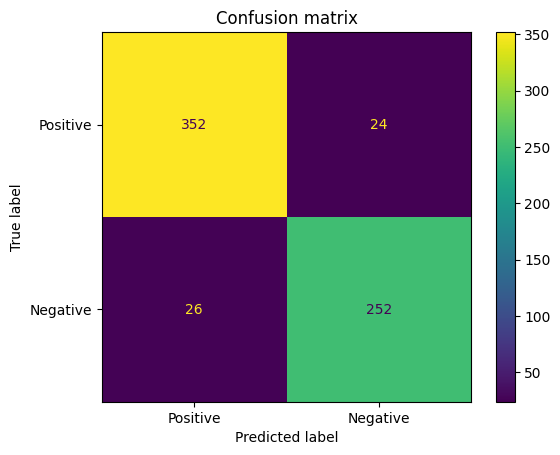

In [ ]:
print('Random Forest with Random Search Tuning')
print('-----------------------------------------')
tuned_model(rs_best_params, X_ros, y_ros)

Random Forest with Grid Search Tuning
-----------------------------------------
Accuracy: 94.19%
Precision: 94.78%
Recall: 91.37%
F1-score: 93.04%


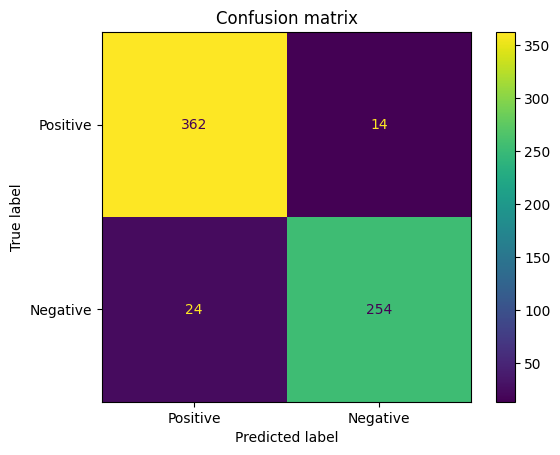

In [ ]:
print('Random Forest with Grid Search Tuning')
print('-----------------------------------------')
tuned_model(gs_best_params, X_ros, y_ros)

### **Test of Hypothesis**

To evaluate the relationship between the most important features and attrition, we ran a correlation analysis and set the significance level to 0.05. if the test's p-value is less than 0.05, we reject the null hypothesis and accept the alternate hypothesis





Correlation between MonthlyIncome and attrition:
Correlation coefficient: -0.15983958238498874
p-value: 7.147363985353804e-10
Reject the null hypothesis. There is a significant relationship.

Correlation between Age and attrition:
Correlation coefficient: -0.1592050068657796
p-value: 8.35630802110312e-10
Reject the null hypothesis. There is a significant relationship.

Correlation between TotalWorkingYears and attrition:
Correlation coefficient: -0.17106324613622648
p-value: 4.061878111266881e-11
Reject the null hypothesis. There is a significant relationship.


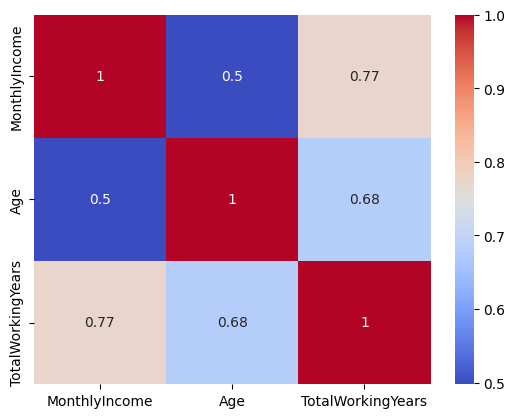

In [ ]:
#Identify the important features

hypothesis_feat = ['MonthlyIncome', 'Age', 'TotalWorkingYears']
attrition = employee_encoded['Attrition']
# Create a correlation matrix
correlation_matrix = employee_encoded[hypothesis_feat].corr()
# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Test the significance of correlations
alpha = 0.05  #significance level 
for feature in hypothesis_feat:
    correlation, p_value = stats.pearsonr(employee_encoded[feature], attrition)

    print("\nCorrelation between " + feature + " and attrition:")
    print("Correlation coefficient:", str(correlation))
    print("p-value:", str(p_value))

    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant relationship.")
    else:
        print("Fail to reject the null hypothesis. There is no significant relationship.")

